In [1]:
import math
import sympy
import numpy as np
from sympy.abc import x,y
from sympy import *
import matplotlib.pyplot as plt
init_printing( use_latex='mathjax' )
f = Function("f")

1. Реализовать предложенный метод численного решения данной системы уравнений

In [2]:
# Определяем функцию правых частей системы ОДУ
def f(t, u, v):
    return np.array([v, -u**3])

In [3]:
# Определяем метод Рунге-Кутты с таблицей Бутчера
def runge_kutta_butcher(f, u0, v0, T, h):
    N = int(T/h) # вычисляем количество шагов
    u = np.zeros(N+1) # создаем массив для значений u
    v = np.zeros(N+1) # создаем массив для значений v
    t = np.linspace(0, T, N+1) # создаем массив для значений времени
    u[0], v[0] = u0, v0 # задаем начальные условия
    # создаем таблицу коэффициентов метода Бутчера
    A = np.array([[0, 0, 0, 0],
                  [1/2, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, 0]])
    b = np.array([1/6, 2/3, 0, 1/6])
    c = np.array([0, 1/2, 1/2, 1])
    # основной цикл метода Рунге-Кутты
    for i in range(N):
        k1 = f(t[i], u[i], v[i])
        k2 = f(t[i] + c[1]*h, u[i] + h*A[1,0]*k1[0], v[i] + h*A[1,0]*k1[1])
        k3 = f(t[i] + c[2]*h, u[i] + h*(A[2,0]*k1[0] + A[2,1]*k2[0]), v[i] + h*(A[2,0]*k1[1] + A[2,1]*k2[1]))
        k4 = f(t[i] + c[3]*h, u[i] + h*(A[3,0]*k1[0] + A[3,1]*k2[0] + A[3,2]*k3[0]), v[i] + h*(A[3,0]*k1[1] + A[3,1]*k2[1] + A[3,2]*k3[1]))
        u[i+1] = u[i] + h*(b[0]*k1[0] + b[1]*k2[0] + b[2]*k3[0] + b[3]*k4[0])
        v[i+1] = v[i] + h*(b[0]*k1[1] + b[1]*k2[1] + b[2]*k3[1] + b[3]*k4[1])
    return t, u, v

2. Исследовать предложенный метод на устойчивость

$$R(z) = \frac{det(I - z \cdot A + z \cdot e \cdot b^T)}{det(I - z \cdot A)}$$

В нашем случае имеем явный метод 3 порядка, так что используем выражение:

$$R(z) = \sum\limits_{k=1}^p \frac{z^k}{k!}$$
$$R(z) = \sum\limits_{k=1}^3 \frac{z^k}{k!}$$

Тогда условие устойчивости примет вид:

$$| 1 + z + \frac{z^2}{2} + \frac{z^3}{6} | \leq 1$$

Собственные числа матрицы:

\begin{pmatrix}
0 & 1 \\
-3u^2 & 0
\end{pmatrix}

Равны $\lambda = \pm i \sqrt{3} u$

Максимальное значение решения достигается в начальный момент времени, т.е $\lambda = \pm i \sqrt{3}$, тогда получаем условия на $\Delta t$:

Условие 1:

$$|1+i\sqrt{3}\Delta t + \frac{(i\sqrt{3}\Delta t)^2}{2} + \frac{(i\sqrt{3}\Delta t)^3}{6}| \leq 1$$

$$|1+i\sqrt{3}\Delta t + \frac{-3\Delta t^2}{2} + \frac{-i3\sqrt{3}\Delta t^3}{6}| \leq 1$$

$$(1+\frac{-3\Delta t^2}{2})^2 + (\sqrt{3}\Delta t + \frac{-3\sqrt{3}\Delta t^3}{6})^2 \leq 1$$

Откуда получаем что $\Delta t \leq 1$ 

Условие 2:

$$|1-i\sqrt{3}\Delta t + \frac{(-i\sqrt{3}\Delta t)^2}{2} + \frac{(-i\sqrt{3}\Delta t)^3}{6}| \leq 1$$

$$|1-i\sqrt{3}\Delta t + \frac{-3\Delta t^2}{2} + \frac{i3\sqrt{3}\Delta t^3}{6}| \leq 1$$

$$(1+\frac{-3\Delta t^2}{2})^2 + (-\sqrt{3}\Delta t + \frac{3\sqrt{3}\Delta t^3}{6})^2 \leq 1$$

Откуда получаем что $\Delta t \leq 1$ 

3. Экспериментально определить порядок сходимости, исследуя ошибку численного решения $||y(T) - y(0)||$, сравнить с порядком аппроксимации метода

In [42]:
def err_norm(N):
    h=7.416298709205487/N
    u0, v0 = 1, 0
    t, u, v = runge_kutta_butcher(f, u0, v0, 7.416298709205487, h)
    return h, np.linalg.norm(np.array([u[0],v[0]])-np.array([u[-1],v[-1]]))

In [43]:
Deltas=[]
steps=[]

In [44]:
for i in range(1000,3000,100):
    Deltas.append(err_norm(i)[1])
    steps.append(err_norm(i)[0])

In [45]:
Deltas=np.log(Deltas)
steps=np.log(steps)
print("p_conv = {}".format(np.polyfit(steps, Deltas, 1)[0]))

p_conv = 2.998838479585425


4. Построить графики 𝑢(𝑡), 𝑣(𝑡)

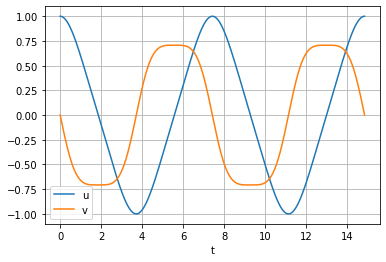

In [9]:
# Задаем начальные условия и параметры задачи
u0, v0 = 1, 0
T, h = 2*7.416298709205487, 0.01
# Вызываем функцию для решения системы ОДУ методом Рунге-Кутты
t, u, v = runge_kutta_butcher(f, u0, v0, T, h)
# Рисуем графики решений u(t) и v(t)
plt.plot(t, u, label='u')
plt.plot(t, v, label='v')
plt.legend()
plt.xlabel('t')
plt.grid()
plt.show()